In [106]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [81]:
# data set url: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


# reading data from csv into df
df = pd.read_csv("data/raw.csv", header=1)

# normalizing data columns
df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)
df.rename(columns={'default_payment_next_month': 'default'}, inplace=True)
print(df.columns)

# exploring data
print(df.shape)

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')
(30000, 25)


In [82]:
print(df.head())

   id  limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   pay_5  pay_6  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0   

In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_0      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

In [84]:
df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [85]:
# droping id column
df.drop(columns=['id'], inplace=True)

In [86]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [87]:
df['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [88]:
# checking for NaN
df.isnull().sum()

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

In [89]:
# EDUCATION
# from the source: X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). In reality there are unrecognized values {0, 5, 6} values.
# We can transfer them into category 4-others or drop it. I think transfer them to others should be good since I don't want to lose samples.
df.groupby('education').size()

education
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
dtype: int64

In [90]:
df['education'] = df['education'].replace({0:4, 5:4, 6:4})
df.groupby('education').size()

education
1    10585
2    14030
3     4917
4      468
dtype: int64

In [91]:
# MARRIAGE
# from the source: X4: Marital status (1 = married; 2 = single; 3 = others). n reality there are unrecognized values {0} value.
df.groupby('marriage').size()



marriage
0       54
1    13659
2    15964
3      323
dtype: int64

In [92]:
df['marriage'] = df['marriage'].replace({0:3})
df.groupby('marriage').size()

marriage
1    13659
2    15964
3      377
dtype: int64

In [93]:
# SEX
df.groupby('sex').size()

sex
1    11888
2    18112
dtype: int64

In [94]:
# -1 = pay fuly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
# NOTE: that -2 stands for no consumption
df.groupby('pay_0').size()

pay_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
dtype: int64

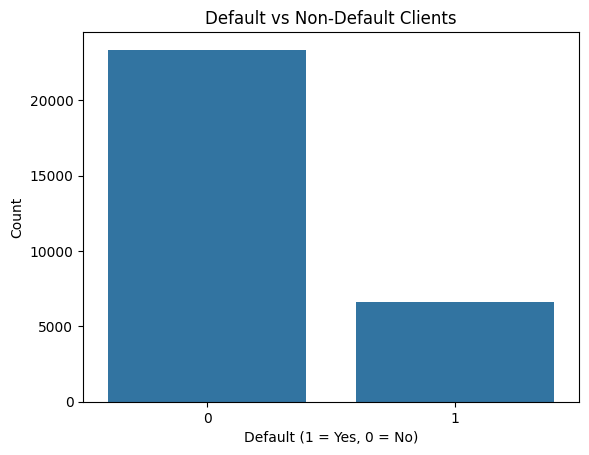

In [97]:
sns.countplot(x='default', data=df)
plt.title('Default vs Non-Default Clients')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


# This shows that our data is inbalanced since the amount of defauls is low.

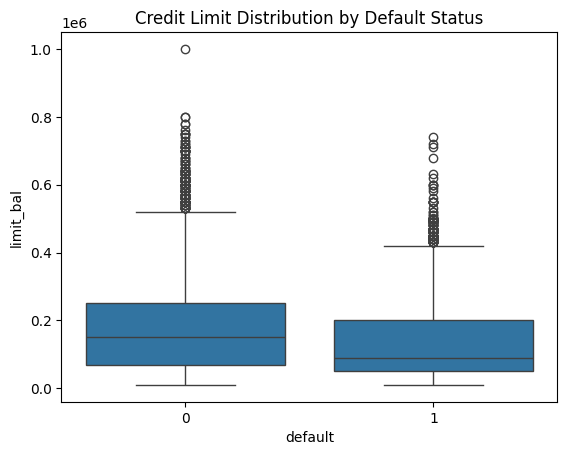

In [98]:
sns.boxplot(x='default', y='limit_bal', data=df)
plt.title('Credit Limit Distribution by Default Status')
plt.show()

# Defaulters have lower cridit limits. This also shaws that data has outliers.

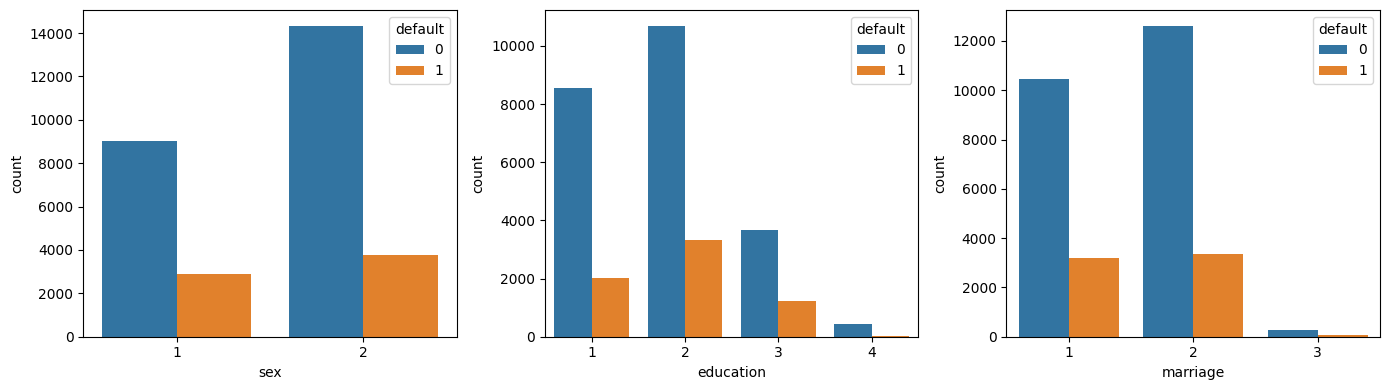

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(14,4))
sns.countplot(x='sex', hue='default', data=df, ax=axes[0])
sns.countplot(x='education', hue='default', data=df, ax=axes[1])
sns.countplot(x='marriage', hue='default', data=df, ax=axes[2])
plt.tight_layout()
plt.show()

# Gender (1 = male; 2 = female).
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# Marital status (1 = married; 2 = single; 3 = others).

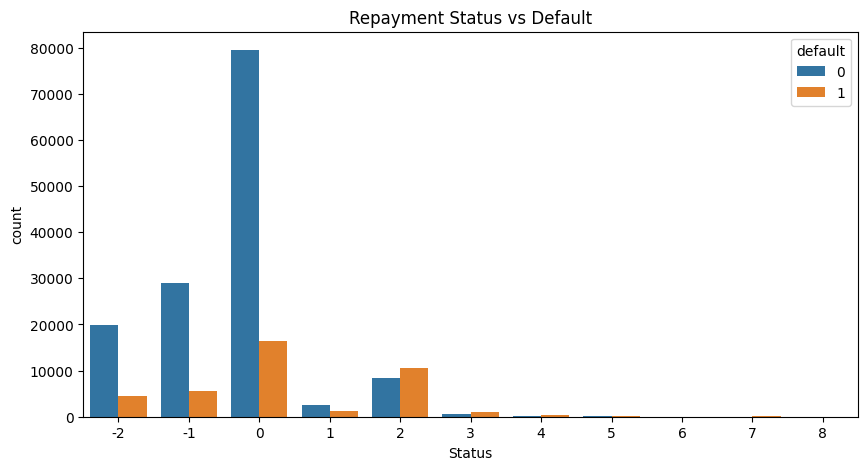

In [102]:
pay_features = [f'pay_{i}' for i in [0,2,3,4,5,6]]
df_melted = df.melt(id_vars='default', value_vars=pay_features, var_name='Month', value_name='Status')

plt.figure(figsize=(10,5))
sns.countplot(data=df_melted, x='Status', hue='default')
plt.title('Repayment Status vs Default')
plt.show()


In [104]:
bill_cols = [f'bill_amt{i}' for i in range(1,7)]
pay_cols = [f'pay_amt{i}' for i in range(1,7)]

df[bill_cols].describe()
df[pay_cols].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


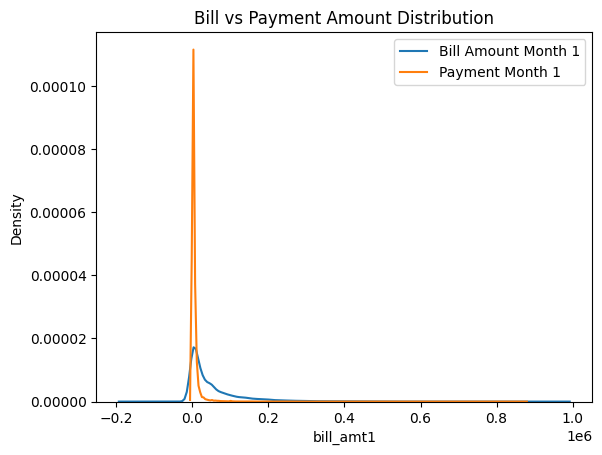

In [105]:


sns.kdeplot(df['bill_amt1'], label='Bill Amount Month 1')
sns.kdeplot(df['pay_amt1'], label='Payment Month 1')
plt.legend()
plt.title('Bill vs Payment Amount Distribution')
plt.show()


In [108]:
df.to_csv('data/processed/preprocessed_data.csv', index=False)